In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df

,scenario,obs_per_trial,n_subj,method,class_true,run,class_pred,RI,RIc,adj.RI,adj.RIc,NMI,NMIc,warnings
0,sc1,2,100,LCA,4,1,4,0.990101,0.990101,0.973298,0.973298,0.968504,0.968504,none
1,sc1,2,100,GLM,4,1,5,0.938586,0.989091,0.809395,0.970532,0.775961,0.968504,none
2,sc1,2,100,BMEM,4,1,6,0.918788,0.980606,0.855316,0.947613,0.711842,0.939049,1 Warnings: Bulk Effective Samples Size (ESS) ...
3,sc1,2,100,LCA,4,2,4,0.990505,0.990505,0.974245,0.974245,0.969662,0.969662,none
4,sc1,2,100,GLM,4,2,5,0.911919,0.917778,0.842749,0.777220,0.727435,0.795244,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,sc9,8,400,GLM,6,14,4,0.887569,0.860639,0.702632,0.597713,0.698743,0.654921,none
3641,sc9,8,400,BMEM,6,14,4,0.839323,0.879662,0.570940,0.653491,0.600031,0.671801,2 Warnings: Bulk Effective Samples Size (ESS) ...
3642,sc9,8,400,LCA,6,15,6,0.985263,0.984787,0.958648,0.957311,0.942594,0.936306,none
3643,sc9,8,400,GLM,6,15,6,0.900175,0.900175,0.695162,0.695162,0.737953,0.737953,2 Warnings: Model failed to converge with max|...


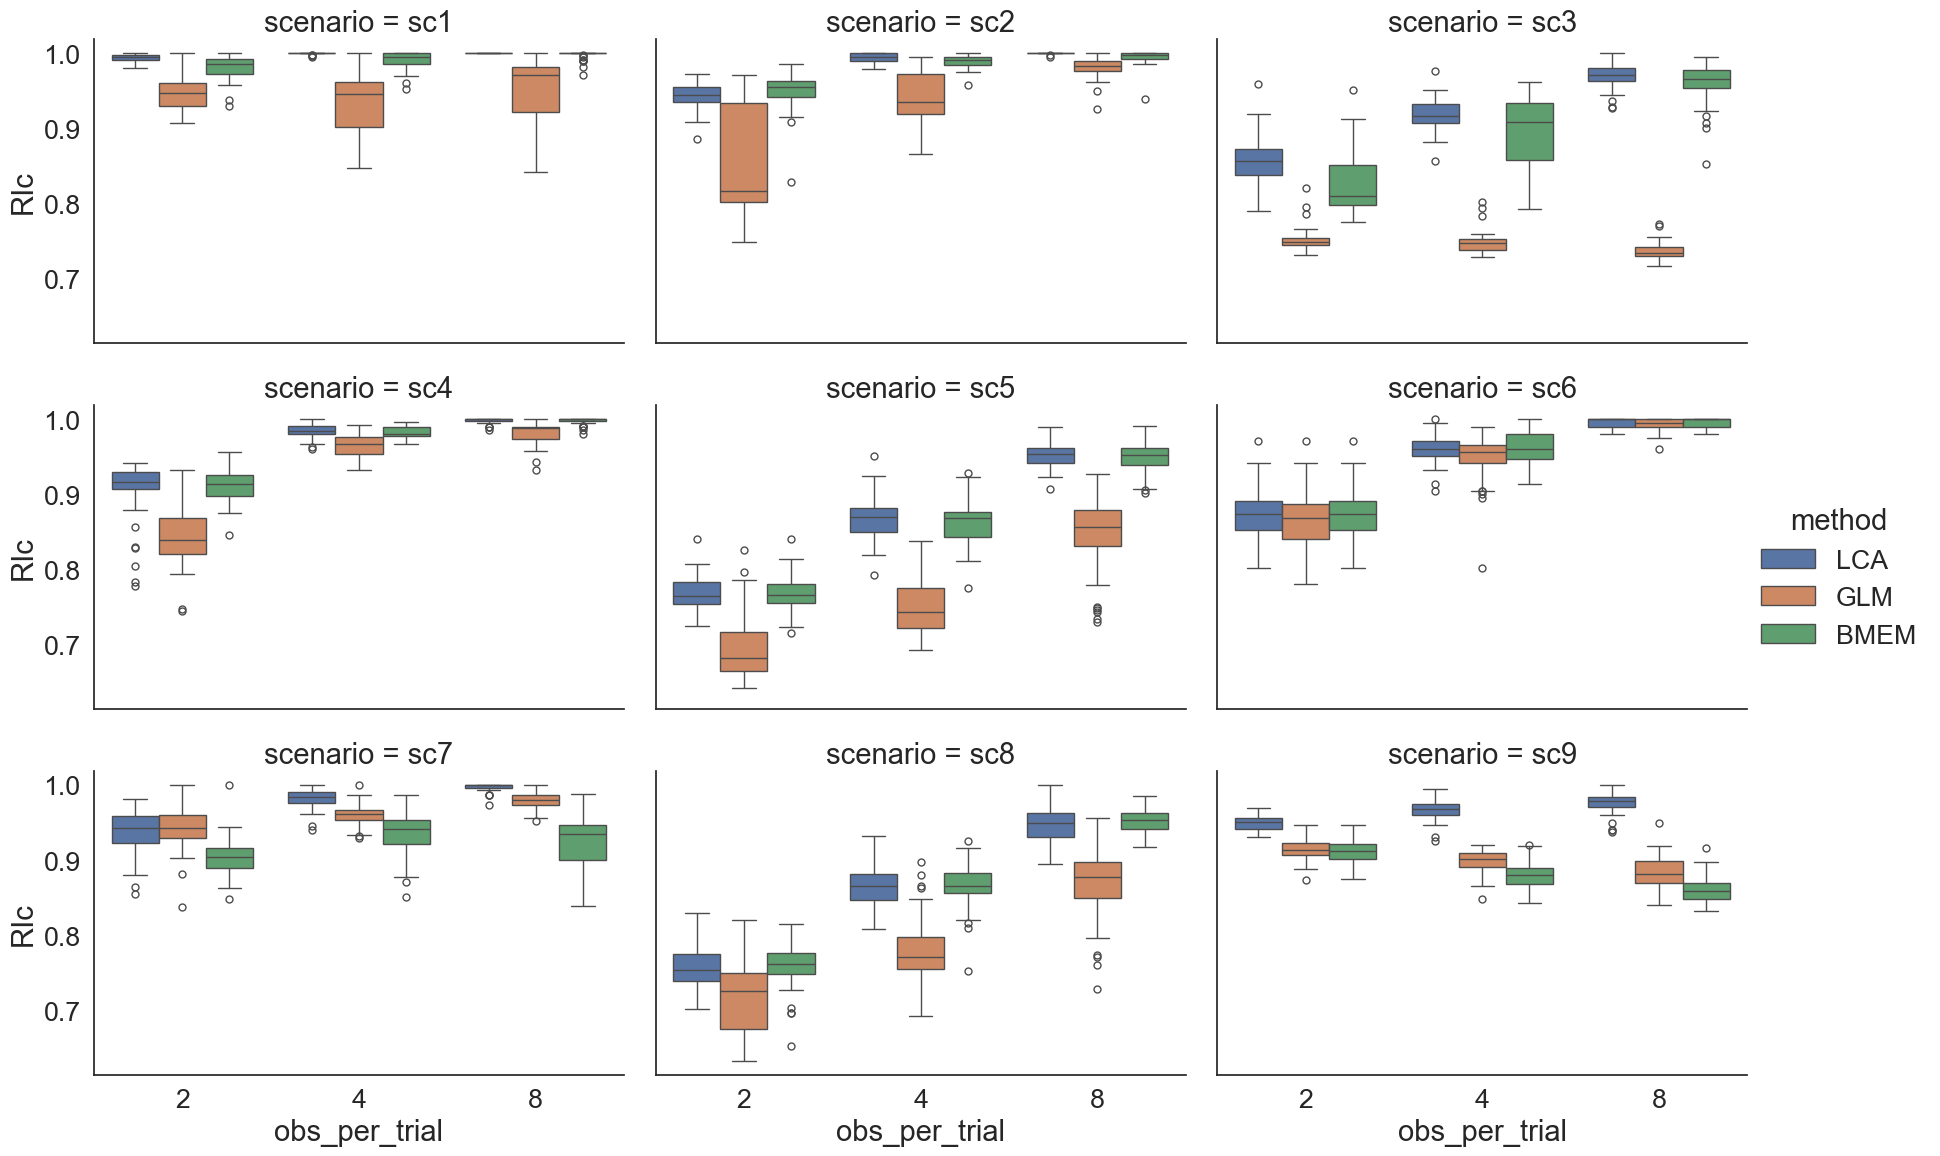

In [4]:
results = df
sns.set_theme(font_scale=1.75, style="white")
sns.catplot(x='obs_per_trial', y='RIc', hue='method', col='scenario',col_wrap=3, kind='box', data=results,  height=4, aspect=1.5)
plt.savefig("./all_sc_nsub_ric.pdf", format="pdf")

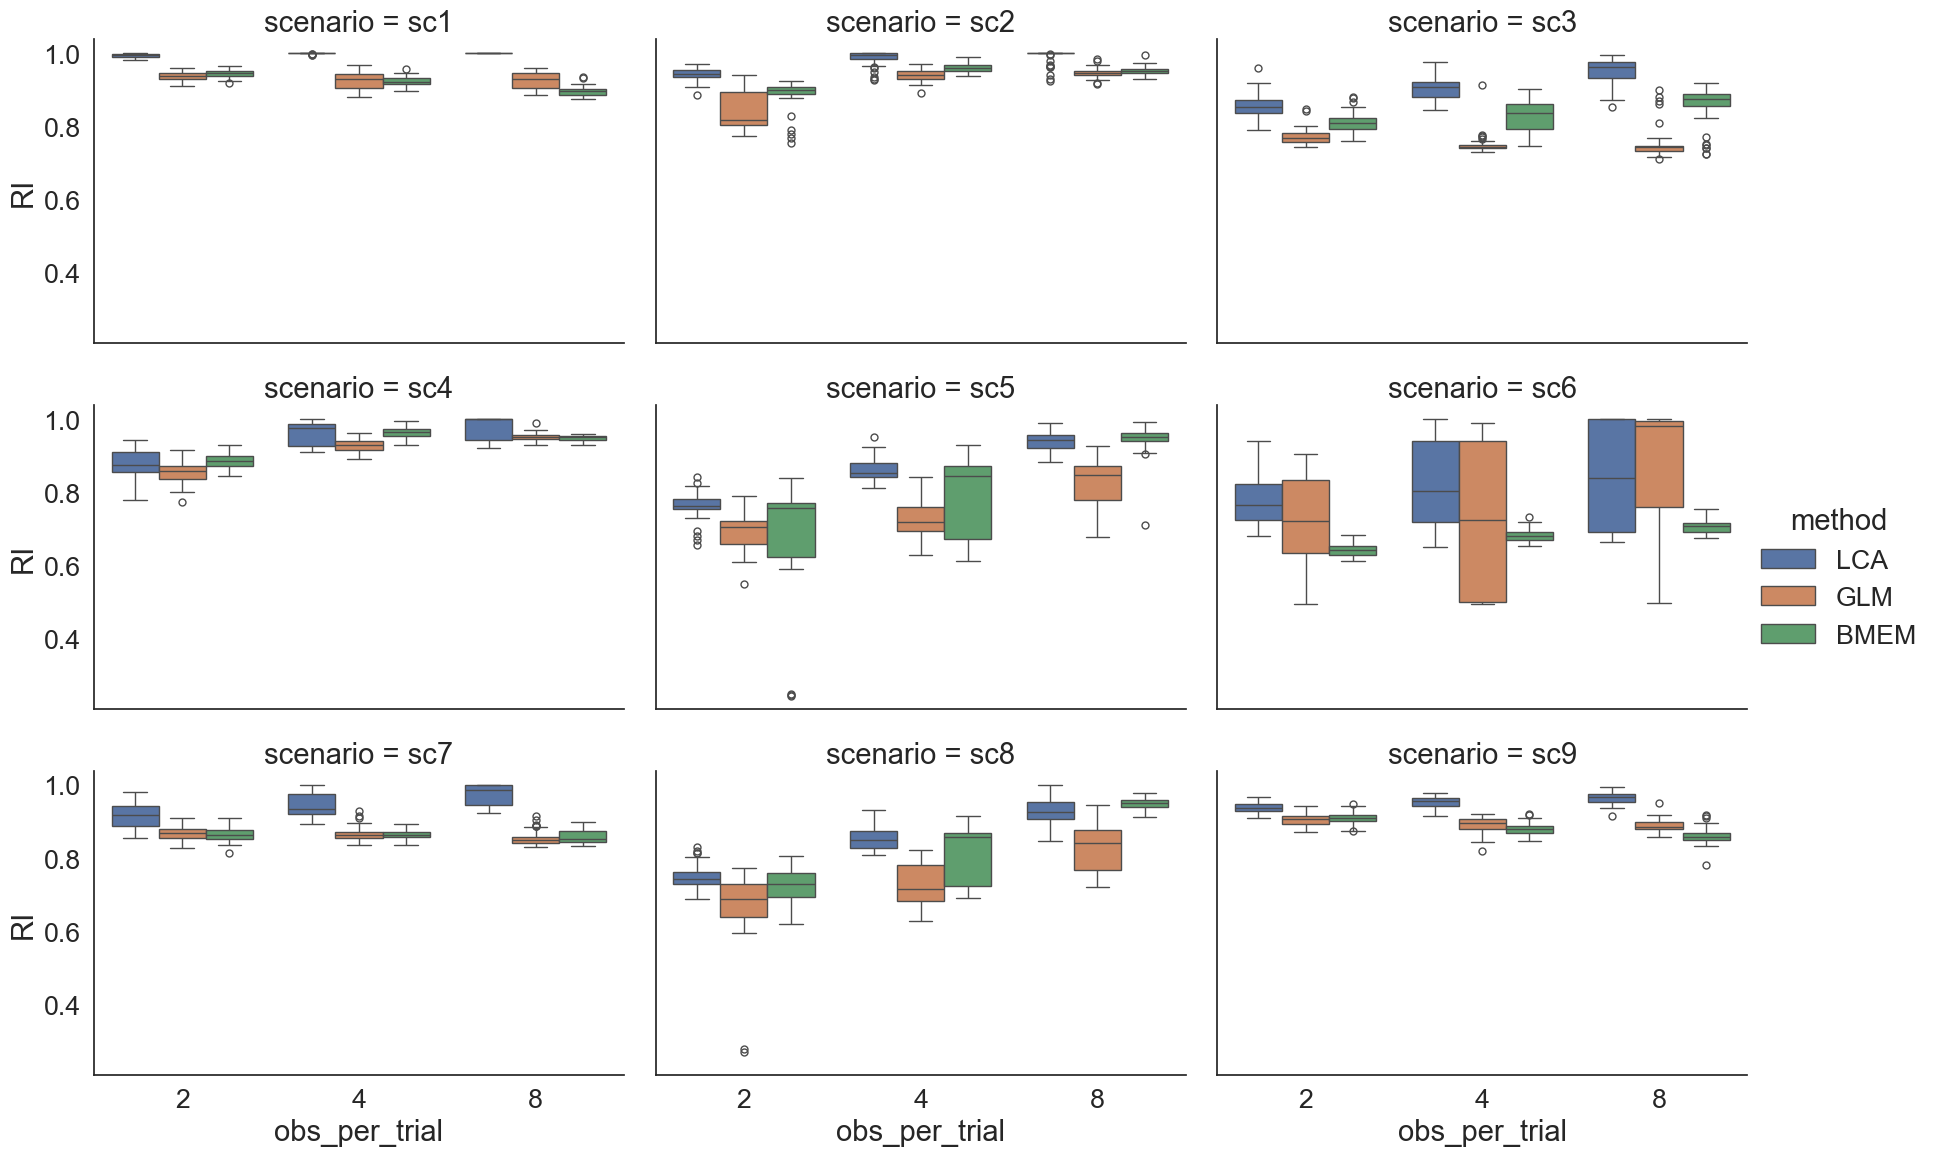

In [5]:
results = df
sns.set_theme(font_scale=1.75, style="white")
sns.catplot(x='obs_per_trial', y='RI', hue='method', col='scenario',col_wrap=3, kind='box', data=results,  height=4, aspect=1.5)
plt.savefig("./all_sc_nsub_ri.pdf", format="pdf")


In [6]:

grouped_data = df.groupby(["scenario"])[["RI"]].agg(["mean", "std"]).reset_index()

grouped_data[('RI', 'mean')] = grouped_data[('RI', 'mean')].round(2)
grouped_data[('RI', 'std')] = grouped_data[('RI', 'std')].round(2)


sorted_data = grouped_data.sort_values(by=[('RI', 'mean')], ascending=False)
sorted_data

scenario    RI      
            mean   std
0      sc1  0.95  0.04
1      sc2  0.94  0.05
3      sc4  0.93  0.05
8      sc9  0.91  0.04
6      sc7  0.89  0.05
2      sc3  0.83  0.07
4      sc5  0.80  0.11
7      sc8  0.80  0.11
5      sc6  0.75  0.14

In [7]:

grouped_data = df.groupby(["scenario"])[["RIc"]].agg(["mean", "std"]).reset_index()

grouped_data[('RIc', 'mean')] = grouped_data[('RIc', 'mean')].round(2)
grouped_data[('RIc', 'std')] = grouped_data[('RIc', 'std')].round(2)


sorted_data = grouped_data.sort_values(by=[('RIc', 'mean')], ascending=False)
sorted_data

scenario   RIc      
            mean   std
0      sc1  0.98  0.03
1      sc2  0.96  0.05
3      sc4  0.95  0.05
6      sc7  0.95  0.04
5      sc6  0.94  0.06
8      sc9  0.92  0.04
2      sc3  0.85  0.09
7      sc8  0.84  0.09
4      sc5  0.83  0.09

In [8]:

grouped_data = df[df["method"]=="LCA"].groupby(["scenario"])[["RI"]].agg(["mean", "std"]).reset_index()

grouped_data[('RI', 'mean')] = grouped_data[('RI', 'mean')].round(2)
grouped_data[('RI', 'std')] = grouped_data[('RI', 'std')].round(2)


sorted_data = grouped_data.sort_values(by=[('RI', 'mean')], ascending=False)
sorted_data

scenario    RI      
            mean   std
0      sc1  1.00  0.00
1      sc2  0.97  0.03
8      sc9  0.95  0.02
3      sc4  0.94  0.06
6      sc7  0.94  0.04
2      sc3  0.90  0.05
4      sc5  0.85  0.08
7      sc8  0.84  0.08
5      sc6  0.81  0.11

Scenarios

In [19]:
data = df[df["scenario"]=="sc6"]

In [20]:
data[data["method"]=="LCA"].sort_values("RI")

,scenario,obs_per_trial,n_subj,method,class_true,run,class_pred,RI,RIc,adj.RI,adj.RIc,NMI,NMIc,warnings
753,sc6,4,400,LCA,2,2,6,0.649799,0.975251,1.000000,0.950501,0.333517,0.905555,none
762,sc6,4,400,LCA,2,5,6,0.653534,0.941654,0.628542,0.883308,0.330769,0.806027,none
756,sc6,4,400,LCA,2,3,6,0.655251,0.951128,0.627446,0.902256,0.333688,0.842107,none
3186,sc6,4,400,LCA,2,13,6,0.660890,0.960702,0.630438,0.921403,0.341019,0.859417,none
3183,sc6,4,400,LCA,2,12,6,0.664323,0.946378,1.000000,0.892757,0.344257,0.832788,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,sc6,8,100,LCA,2,1,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
777,sc6,8,100,LCA,2,5,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
771,sc6,8,100,LCA,2,3,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none
3207,sc6,8,100,LCA,2,15,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,none


In [15]:
for method in ["LCA", "GLM", "BMEM"]:
    success = len(data[(data["class_pred"] == data["class_true"])& (data["method"]== method)]) / len(data[data["method"]== method])
    print(f"{method}: {round(success,2)}")

LCA: 0.14
GLM: 0.47
BMEM: 0.77


In [16]:
grouped_data = data.groupby(["obs_per_trial", "method"])[["class_pred", "RI", "RIc"]].agg(["mean", "std"]).reset_index()

grouped_data[('RI', 'mean')] = grouped_data[('RI', 'mean')].round(2)
grouped_data[('RI', 'std')] = grouped_data[('RI', 'std')].round(2)
grouped_data[('RIc', 'mean')] = grouped_data[('RIc', 'mean')].round(2)
grouped_data[('RIc', 'std')] = grouped_data[('RIc', 'std')].round(2)

grouped_data[('class_pred', 'mean')] = grouped_data[('class_pred', 'mean')].round(2)
grouped_data[('class_pred', 'std')] = grouped_data[('class_pred', 'std')].round(2)

grouped_data.sort_values(["method"])

obs_per_trial method class_pred          RI         RIc      
                             mean   std  mean   std  mean   std
0             2   BMEM       5.89  0.32  0.91  0.01  0.91  0.01
3             4   BMEM       5.71  0.55  0.88  0.02  0.88  0.02
6             8   BMEM       5.47  0.84  0.86  0.02  0.86  0.02
1             2    GLM       5.29  0.89  0.91  0.02  0.91  0.01
4             4    GLM       4.96  0.85  0.89  0.02  0.90  0.02
7             8    GLM       5.11  0.93  0.89  0.02  0.88  0.02
2             2    LCA       4.07  0.33  0.94  0.01  0.95  0.01
5             4    LCA       4.62  0.68  0.95  0.01  0.97  0.01
8             8    LCA       5.07  0.75  0.97  0.02  0.98  0.01

In [17]:
grouped_data = data.groupby(["method"])[["class_pred", "RI", "RIc"]].agg(["mean", "std"]).reset_index()

grouped_data[('RI', 'mean')] = grouped_data[('RI', 'mean')].round(2)
grouped_data[('RI', 'std')] = grouped_data[('RI', 'std')].round(2)
grouped_data[('RIc', 'mean')] = grouped_data[('RIc', 'mean')].round(2)
grouped_data[('RIc', 'std')] = grouped_data[('RIc', 'std')].round(2)

grouped_data[('class_pred', 'mean')] = grouped_data[('class_pred', 'mean')].round(2)
grouped_data[('class_pred', 'std')] = grouped_data[('class_pred', 'std')].round(2)
grouped_data

method class_pred          RI         RIc      
               mean   std  mean   std  mean   std
0   BMEM       5.69  0.63  0.88  0.03  0.88  0.03
1    GLM       5.12  0.90  0.90  0.02  0.90  0.02
2    LCA       4.59  0.74  0.95  0.02  0.96  0.02

In [18]:
data[data["method"]=="LCA"].sort_values("RI")

,scenario,obs_per_trial,n_subj,method,class_true,run,class_pred,RI,RIc,adj.RI,adj.RIc,NMI,NMIc,warnings
3513,sc9,2,100,LCA,6,12,3,0.908889,0.948889,0.778766,0.861214,0.727155,0.835000,none
1104,sc9,2,200,LCA,6,4,4,0.911859,0.933618,0.770100,0.815170,0.694784,0.783911,none
1122,sc9,2,400,LCA,6,5,4,0.913509,0.938972,0.777016,0.834382,0.726289,0.802197,none
3606,sc9,8,100,LCA,6,13,4,0.915758,0.959596,0.781927,0.886537,0.771929,0.875083,none
3561,sc9,4,100,LCA,6,13,4,0.916566,0.961616,0.780362,0.888469,0.732426,0.883686,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,sc9,8,200,LCA,6,13,6,0.987136,0.987136,0.963687,0.963687,0.951979,0.951979,none
1206,sc9,8,400,LCA,6,3,6,0.987820,0.987820,0.967400,0.967493,0.953336,0.950701,none
3639,sc9,8,400,LCA,6,14,6,0.988008,0.979900,0.968083,0.945700,0.949614,0.916576,none
2418,sc9,8,400,LCA,6,7,6,0.990088,0.991704,0.973176,0.977581,0.953462,0.962596,none
